In [1]:
import sys,os,glob

In [2]:
import ROOT as R
from array import array
import uproot

Welcome to JupyROOT 6.20/02


In [3]:
R.TMVA.PyMethodBase.PyInitialize()  

In [4]:
reader_dnn = R.TMVA.Reader()
reader_bdt = R.TMVA.Reader()

create data set info Default
create data set info Default


In [5]:
var1 = array('f',[0]); reader_dnn.AddVariable("h_pt",var1)
var2 = array('f',[0]); reader_dnn.AddVariable("h_eta",var2)
var3 = array('f',[0]); reader_dnn.AddVariable("h_deta",var3)
var4 = array('f',[0]); reader_dnn.AddVariable("h_dphi",var4)
var5 = array('f',[0]); reader_dnn.AddVariable("jeteta_1",var5)
var6 = array('f',[0]); reader_dnn.AddVariable("jeteta_2",var6)
var7 = array('f',[0]); reader_dnn.AddVariable("ncentJets",var7)
var8 = array('f',[0]); reader_dnn.AddVariable("njets",var8)
var9 = array('f',[0]); reader_dnn.AddVariable("mjj_1",var9)
var10 = array('f',[0]); reader_dnn.AddVariable("mjj_2",var10)
var11 = array('f',[0]); reader_dnn.AddVariable("detajj_1",var11)
var12 = array('f',[0]); reader_dnn.AddVariable("detajj_2",var12)
var13 = array('f',[0]); reader_dnn.AddVariable("nbtagJets",var13)
var14 = array('f',[0]); reader_dnn.AddVariable("metpt",var14)
var15 = array('f',[0]); reader_dnn.AddSpectator("h_mass",var15)
reader_bdt.AddVariable("h_pt",var1)
reader_bdt.AddVariable("h_eta",var2)
reader_bdt.AddVariable("h_deta",var3)
reader_bdt.AddVariable("h_dphi",var4)
reader_bdt.AddVariable("jeteta_1",var5)
reader_bdt.AddVariable("jeteta_2",var6)
reader_bdt.AddVariable("ncentJets",var7)
reader_bdt.AddVariable("njets",var8)
reader_bdt.AddVariable("mjj_1",var9)
reader_bdt.AddVariable("mjj_2",var10)
reader_bdt.AddVariable("detajj_1",var11)
reader_bdt.AddVariable("detajj_2",var12)
reader_bdt.AddVariable("nbtagJets",var13)
reader_bdt.AddVariable("metpt",var14)
reader_bdt.AddSpectator("h_mass",var15)

In [6]:
# var16 = array('f',[0]); reader.AddSpectator("h_mass",var16)

In [7]:
reader_dnn.BookMVA("DNN","dataset_f/weights/factory_DNN.weights.xml")



Using TensorFlow backend.


<ROOT.TMVA::MethodPyKeras object ("DNN") at 0x7ffe68053000>

                         : Booking "DNN" of type "PyKeras" from dataset_f/weights/factory_DNN.weights.xml.
                         : Reading weight file: dataset_f/weights/factory_DNN.weights.xml
<WARNING> <WARNING>                : Value for option tensorboard was previously set to 
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "DNN" of type: "PyKeras"


In [8]:
reader_bdt.BookMVA("BDT","dataset_f/weights/factory_BDT.weights.xml")

<ROOT.TMVA::MethodBDT object ("BDT") at 0x7ffe721c2200>

                         : Booking "BDT" of type "BDT" from dataset_f/weights/factory_BDT.weights.xml.
                         : Reading weight file: dataset_f/weights/factory_BDT.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDT" of type: "BDT"


In [9]:
file = R.TFile("TMVA_Output.root")

Error in <TFile::TFile>: file TMVA_Output.root does not exist


In [3]:
t = file.Get("dataset_f/TestTree")

In [ ]:
t.GetEntries()

In [4]:
dnn_scores = R.std.vector('Float_t')()
bdt_scores = R.std.vector('Float_t')()
classes = R.std.vector('Bool_t')()
weight = R.std.vector('Float_t')()

In [5]:
# k = 0
for e in t:
#     if k == 2:
#         break
#     k+=1
#     print(e.DNN)
#     print(e.classID)
#     print(e.weight)
    dnn_scores.push_back(e.DNN)
    bdt_scores.push_back(e.BDT)
    classes.push_back(1-e.classID)
    weight.push_back(e.weight)
    

In [6]:
bdt_rc = R.TMVA.ROCCurve(bdt_scores,classes,weight)
dnn_rc = R.TMVA.ROCCurve(dnn_scores,classes,weight)

In [7]:
dnn_roc = dnn_rc.GetROCCurve()
bdt_roc = bdt_rc.GetROCCurve()


Info in <TCanvas::Print>: png file roc_115_135.png has been created


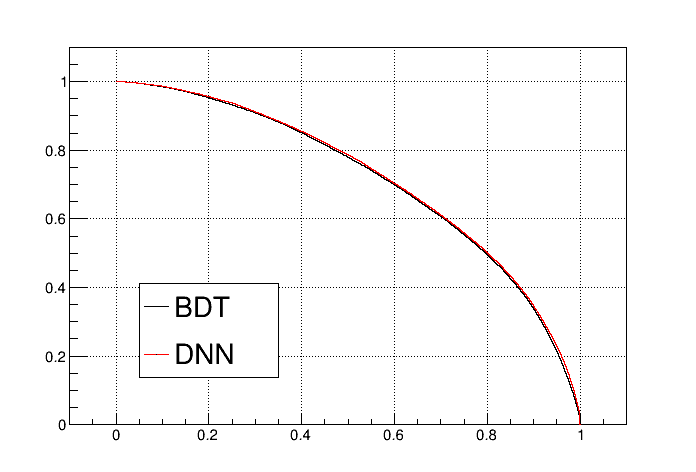

In [8]:
c6 = R.TCanvas("c6","c6")
c6.SetGrid()
leg = R.TLegend(0.2, 0.2, .4, .4)

bdt_roc.SetTitle("")
bdt_roc.SetLineColor(R.kBlack)
leg.AddEntry(bdt_roc,"BDT")
bdt_roc.Draw()

dnn_roc.SetTitle("")
dnn_roc.SetLineColor(R.kRed)
leg.AddEntry(dnn_roc,"DNN")
dnn_roc.Draw("same")
leg.Draw()

c6.Draw()
c6.SaveAs("roc_115_135.png")

In [ ]:
# ran this and saved..
events = []

i = 0
for e in t:
    if i== 2:
        break
    i += 1
    var1[0]=e.h_pt
    var2[0]=e.h_eta
#     var3[0]=e.h_phi
    var3[0]=e.h_deta
    var4[0]=e.h_dphi
    var5[0]=e.jeteta_1
    var6[0]=e.jeteta_2
    var7[0]=e.ncentJets
    var8[0]=e.njets
    var9[0]=e.mjj_1
    var10[0]=e.mjj_2
    var11[0]=e.detajj_1
    var12[0]=e.detajj_2
    var13[0]=e.nbtagJets
    var14[0]=e.metpt
    label = e.classID
    dnn_score = reader_dnn.EvaluateMVA("DNN")
#     bdt_score = reader_bdt.EvaluateMVA("BDT")
    w = e.weight
    
#     events.append([dnn_score,bdt_score,label,w])
    print(dnn_score)
    print(label)
    print(w)

In [ ]:
import pickle

with open('event_mva_dump', 'wb') as fp:
    pickle.dump(events, fp)